In [64]:
import pymongo as pm
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
client = pm.MongoClient("mongodb://192.168.0.109:27017")
db = client["tarea"]

In [66]:
fase1 = { "$match": { "date": { "$gte": dt.datetime(2020, 1, 4, 0, 0), "$lte": dt.datetime(2022, 1, 1, 0, 0) } } }
fase2 = { "$project": { "date_new": { "$dateToString": { "format": "%Y-%m", "date": "$date" } }, "new_deaths": 1, "date": 1 } }
fase3 = { "$group": { "_id": "$date_new", "total_muertes": { "$sum": "$new_deaths" } } }
fase4 = { "$sort": { "_id": 1 } }
df = pd.DataFrame( db.get_collection("covid19").aggregate( [ fase1, fase2, fase3, fase4 ] ) )

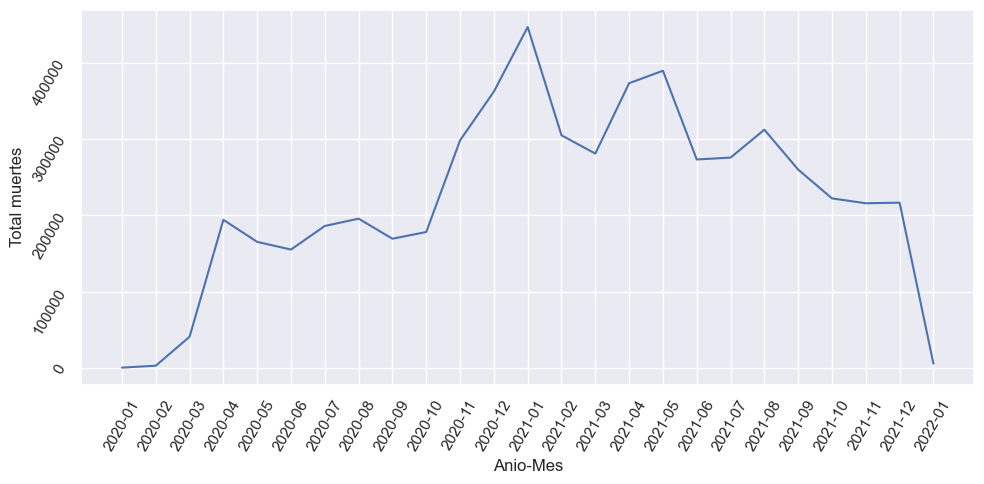

In [67]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
sns.set_theme( style="darkgrid" )
ax = sns.lineplot( x="_id", y="total_muertes", data=df )
ax.tick_params (rotation = 60)
ax.set(xlabel='Anio-Mes', ylabel='Total muertes')
plt.show()